# Entanglement Swapping

Implementation of Alice Bob Charlie example, qubits: $A$ $B$ $C_1$ $C_2$

<IPython.core.display.Latex object>

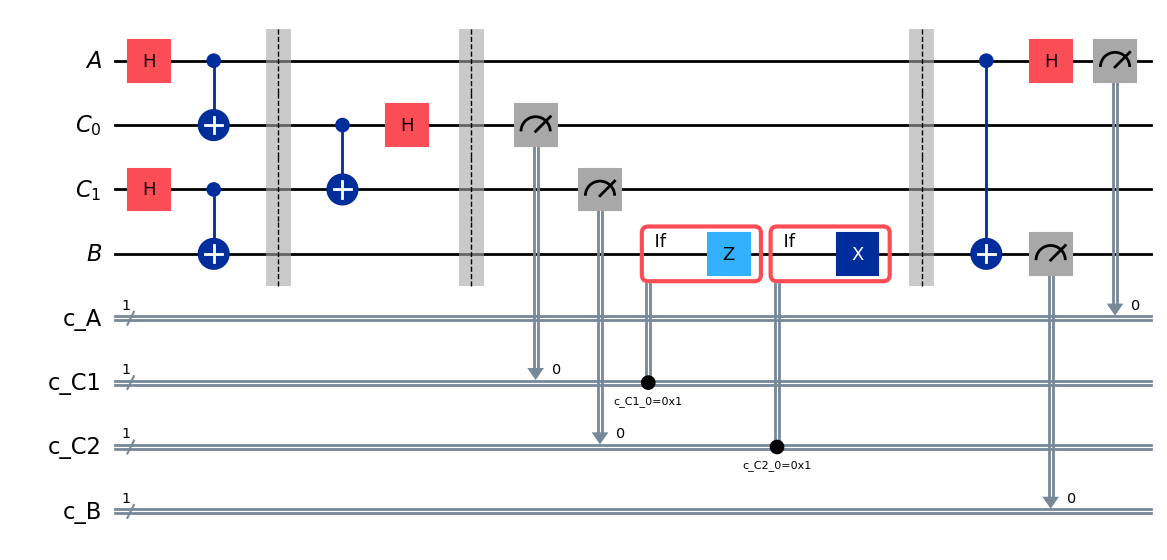

In [176]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import DensityMatrix, Statevector
from sympy.printing.latex import latex
from IPython.display import display, Math

qr_A = QuantumRegister(1, name='A')
qr_B = QuantumRegister(1, name='B')
qr_C = QuantumRegister(2, name='C')
cr_A = ClassicalRegister(1,name='c_A')
cr_B = ClassicalRegister(1,name='c_B')
cr_C1 = ClassicalRegister(1,name='c_C1')
cr_C2 = ClassicalRegister(1,name='c_C2')

# Create QuantumCircuit
qc = QuantumCircuit(qr_A, qr_C, qr_B, cr_A, cr_C1, cr_C2, cr_B, name='Entanglement Swapping')

# Preparação qubits
qc.h(0)
qc.cx(0,1)
qc.h(2)
qc.cx(2,3)
qc.barrier()

qc.cx(1,2)
qc.h(1)

qc.barrier()

state = Statevector(qc)
display(state.draw('latex'))

qc.measure(qr_C[0], cr_C1)
qc.measure(qr_C[1], cr_C2)
with qc.if_test((cr_C1[0], 1), label='C1 = 1'):
    qc.z(3)
with qc.if_test((cr_C2[0], 1), label='C2 = 1'):
    qc.x(3)

qc.barrier()
qc.cx(0,3)
qc.h(0)

qc.measure(qr_A, cr_A)
qc.measure(qr_B, cr_B)
qc.draw('mpl', plot_barriers=True, filename='ESWAP_circuit.png')

#display(qc.draw('mpl', plot_barriers=True,filename='ESWAP_circuit.png'))

Simulação está de acordo com o esperado,

\begin{equation*}
\begin{aligned}
| C_1 C_2 \rangle = | 0 0 \rangle \rightarrow  |\Phi^{+}\rangle_{C_1C_2} &\rightarrow |\Phi^{+}\rangle_{AB} \\
| C_1 C_2 \rangle = | 0 1 \rangle \rightarrow  |\Phi^{-}\rangle_{C_1C_2} &\rightarrow |\Phi^{-}\rangle_{AB} \\
| C_1 C_2 \rangle = | 1 0 \rangle \rightarrow  |\Psi^{+}\rangle_{C_1C_2} &\rightarrow |\Psi^{+}\rangle_{AB} \\
| C_1 C_2 \rangle = | 1 1 \rangle \rightarrow  |\Psi^{-}\rangle_{C_1C_2} &\rightarrow |\Psi^{-}\rangle_{AB} \\
\end{aligned}
\end{equation*}

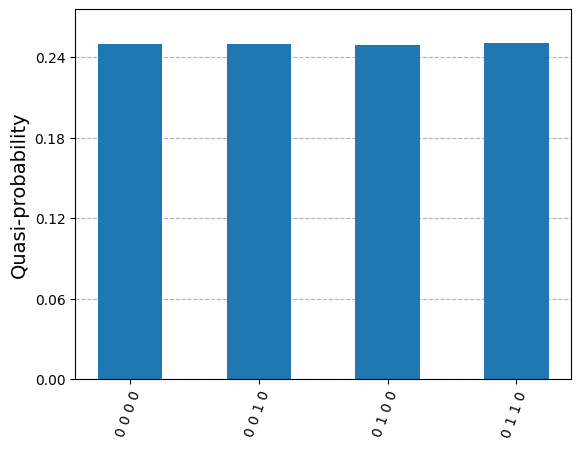

In [177]:
# Simulação
import qiskit_aer
from qiskit import transpile
from qiskit.visualization import plot_histogram

samples=1e6

simulator = qiskit_aer.AerSimulator()
program_ = transpile(qc, simulator)
job = simulator.run(program_, shots=samples)


result = job.result()
counts = result.get_counts()

normalized_counts = {k: v/samples for k, v in counts.items()}

plot_histogram(normalized_counts, bar_labels=False, filename='ESWAP_histogram.png')
display(plot_histogram(normalized_counts, bar_labels=False)) # eixo X ta |C_1 C_2 A B >